<h1>The Ontario Trillium Fundation</h1>

The [Ontario Trillium Foundation (OTF)](http://www.otf.ca/) is an agency of the Ontario provincial government that allocates more than $136 million annually in social/community program funding annually province-wide.  Applications are submitted (largely) [online](http://www.otf.ca/apply-grant) and are [judged](http://www.otf.ca/how-we-work/lifecycle-grant) by panels composed of OTF staff and local volunteers before being forwarded to the Board of Directors for final approval.  Once approved, a project is monitored on a semiannual to annual basis.  Upon successful completion of the project, a final report is submitted to release any remaining funding.

There are multiple types of investment, or ["streams"](http://www.otf.ca/what-we-fund/investment-streams).  As of fiscal year (FY) 2015, these are:

* **Seed Grants**: for studies, trials or conferences and discussion panels to investigate new concepts. \$5,000 - 75,000, up to 1 year.
* **Grow Grants**: for replicating, adapting or scaling a proven model, or piloting and demonstrating a tested model.  \$50,000 - 250,000 per year, for 2 to 3 years.
* **Capital Grants**: for purchasing, upgrading or renovating infrastructure.  \$5,000 - 150,000, up to 1 year.
* **Collective Impact Grants**: for a multilateral initiative by multiple actors and agencies to tackle a broader issue.  Up to \$500,000 per year, for up to 5 years, though funding will vary depending on the [stage of the initiative](http://www.otf.ca/what-we-fund/investment-streams/collective-impact-grants).

Applications are evaluated in accordance with what OTF believes will improve the quality of life of Ontarians, as measured by the [Canadian Index for Wellbeing (CIW)](https://uwaterloo.ca/canadian-index-wellbeing/).  As of FY 2015, OTF focuses on six ["Action Areas"](http://www.otf.ca/what-we-fund/action-areas) and their [corresponding CIW measurements](http://www.otf.ca/how-we-work/canadian-index-wellbeing): Active People (providing physical activity spaces and opportunities), Connected People (improving community connectivity and civil participation), Green People (environmentally sensitive and sustainable living), Inspired People (culture and the arts), Promising Young People (fostering and empowerment of youth) and Prosperous People (economic security).  OTF grants up to FY 2014 were divided into four categories (as described in, eg., [OTF's 2014 annual report, pg. 13 - 15](http://www.otf.ca/sites/default/files/annual_report_13-14.pdf)): human and social services, arts and culture, sports and recreation, and the environment.  As most OTF grants are based on the older categories, our analysis uses those.

Individual OTF-funded projects are evaluated based on whether they contribute to [grant result goals](http://www.otf.ca/sites/default/files/investment_strategy2.pdf), such as certifying coaches and volunteers for physical activity programs, or allowing youths facing barriers to reach leadership positions.  On a 3 - 5 year basis, aggregate OTF results are measured against priority outcomes, such as high quality physical activity programs, and more youths that are meaningfully engaged with the community.  On a 10 year basis, OTF's actions are compared against the CIW indicators discussed above.

For details on OTF policies, see [here](http://www.otf-policies.ca/policies--english-.html).

<h2>The OTF Open Data Directory</h2>

In accordance with the Ontario government's Open Data Directive, OTF provides data on grant applications, summaries of the grant review process, and corporate expenses on their [open data page](http://www.otf.ca/open).  A full listing of data provided can be found in [this document](http://www.otf.ca/sites/default/files/otf_data_inventory_en.xlsx).

In [62]:
# Preamble

import numpy as np
import matplotlib.pyplot as plt
import pylab
import pandas as pd
import sklearn as skl
import os
#import seaborn as sns

%matplotlib notebook

<h1>OTF Grants</h1>

The OTF grants dataset from 1999 - 2016 is split into two files:

    Ontario Trillium Fund. No date. Grants for the period between 1999 to 2015 (database).
    http://www.otf.ca/sites/default/files/otf_granting_data_fiscal_year_2000-2015_20150717.csv (accessed November 22nd, 2016).

    Ontario Trillium Fund. No date. Grants for the period between 2015 to 2016 (database).
    http://www.otf.ca/sites/default/files/otf_granting_data_since_april_1_2015.csv (accessed November 22nd, 2016).

The geographic regions used in these files is related to the Statistics Canada census regions with this file:

    Ontario Trillium Fund. No date.  OTF Catchment area census division (database).
    http://www.otf.ca/sites/default/files/otf_catchment_area-census_division_concordance_file.csv (acessed November 23rd, 2016).

<h2>Downloading Data</h2>

Downloading the files listed above into the working directory ("file_path" below) will cause the notebook to read them.  Otherwise, it will download the files directly into the notebook from the URLs.  I've included copies in the folder so I don't have to download it all the time.

In [3]:
file_path = "./"

# If files aren't locally stored, download from source, but this might not work if OTF ever decides to alter the URLs. 
if not os.path.isfile(file_path + "otf_granting_data_fiscal_year_2000-2015_20150717.csv"):
    filenpath = file_path + "otf_granting_data_since_april_1_2015.csv"
    fileopath = file_path + "otf_granting_data_fiscal_year_2000-2015_20150717.csv"
else:
    filenpath = "http://www.otf.ca/sites/default/files/otf_granting_data_since_april_1_2015.csv"
    fileopath = "http://www.otf.ca/sites/default/files/otf_granting_data_fiscal_year_2000-2015_20150717.csv"
    
otfn = pd.read_csv(filenpath, sep=',', header=0, names=None, index_col=None, 
                   usecols=list(range(3,15)) + list(range(16,25)), encoding = "ISO-8859-1")

otfo = pd.read_csv(fileopath, sep=',', header=0, names=None, index_col=None, 
                   usecols=list(range(3,15)) + list(range(16,25)), encoding = "ISO-8859-1")

otfo.rename(columns={otfo.dtypes.index[3]: otfn.dtypes.index[3]}, inplace=True)  # Only label that's different between the two
otf = pd.concat([otfn, otfo], axis=0)
otf.reset_index(inplace=True, drop=True)
on_index = otf.dtypes.index

<h2>Initial Data Cleaning</h2>

Simplify labels by removing their French tag and shortening their English one.

In [4]:
# Simplify labels
revised_index = {on_index[0]: "Fiscal Year", on_index[1]: "Grant Programme",
                on_index[2]: "Geographical Area", on_index[3]: "Cross-catchment indicator",
                on_index[4]: "Identifier", on_index[5]: "Organization",
                on_index[6]: "Submission date", on_index[7]: "Approval date",
                on_index[8]: "Amount Applied For", on_index[9]: "Amount Awarded",
                on_index[10]: "Planned Duration (months)", on_index[11]: "Description",
                on_index[12]: "Program Area", on_index[13]: "Budget Fund",
                on_index[14]: "Recipient Org Incorporation Number", on_index[15]: "Recipient Org Charitable Registration Number",
                on_index[16]: "Recipient Org City", on_index[17]: "Recipient Org Postal Code",
                on_index[18]: "Co-Application", on_index[19]: "Population Served",
                on_index[20]: "Age Group"}
#on_index[21]: "Grant Result",
#on_index[22]: "Rescinded/Recovered", on_index[23]: "Rescinded/Recovered Initiated By",
#on_index[24]: "Amount Rescinded/Recovered", on_index[25]: "Last modified",
otf.rename(columns=revised_index, inplace=True)
on_index = otf.columns.values
print(on_index)

['Fiscal Year' 'Grant Programme' 'Geographical Area'
 'Cross-catchment indicator' 'Identifier' 'Organization' 'Submission date'
 'Approval date' 'Amount Applied For' 'Amount Awarded'
 'Planned Duration (months)' 'Description' 'Program Area' 'Budget Fund'
 'Recipient Org Incorporation Number'
 'Recipient Org Charitable Registration Number' 'Recipient Org City'
 'Recipient Org Postal Code' 'Co-Application' 'Population Served'
 'Age Group']


A few tweaks to the dataset:

* Dates in FY are always YEAR - YEAR + 1, which is redundant.  Created **FYstart**, which holds the fiscal year starting date.  Note that OTF's fiscal year ends on March 31st [according to their 2014 - 2015 annual report](http://www.otf.ca/sites/default/files/annual_report_14-15.pdf).
* Convert Submission date to Python-readable date
* "Program Area" uses both the new action areas as well as older ones.  Created **Program Area Reduced**, which maps the new action areas to the closest equivalent older one.

In [5]:
def reduceFY(otf, fyindexstr):
    return [int(year.split("-")[0]) for year in otf.loc[:,fyindexstr]]

# Resets index after sorting by submission date.  Otherwise otf is sorted by approval date descending.
#otf.sort_values(by="Submission date", inplace=True)
#otf.reset_index(inplace=True

otf["FYstart"] = reduceFY(otf, on_index[0])
otf["FYstart_day"] = pd.Series([pd.to_datetime("April 1, {0:d}".format(year)) for year in otf.loc[:,"FYstart"]])
otf["Submission date"] = pd.to_datetime(otf.loc[:,"Submission date"])
otf["Approval date"] = pd.to_datetime(otf.loc[:,"Approval date"])
otf["Program Area Reduced"] = otf.loc[:,"Program Area"].copy()

new_action_areas = {'Active People': 'Sports and Recreation',
                    'Connected People': 'Human and Social Services',
                    'Inspired People': 'Arts and Culture',
                    'Green People': 'Environment',
                    'Prosperous People': 'Human and Social Services',
                    'Prosperous people': 'Human and Social Services',
                    'Promising Young People': 'Human and Social Services'}
for item in new_action_areas:
    otf.loc[otf["Program Area"] == item, ["Program Area Reduced"]] = new_action_areas[item]

<h1>Funding Over Time</h1>

How has OTF funding, funding per capita, and the breakup of funding into different program areas, changed throughout the years?  Bin up projects from each fiscal year.

In [58]:
otf_annual = pd.DataFrame(sorted(otf.loc[:,"FYstart"].unique()), columns=["Year"])

def countfunc(x, otf):
    total_cost = otf.loc[otf["FYstart"] == x[0], "Amount Awarded"]
    total_request = otf.loc[otf["FYstart"] == x[0], "Amount Applied For"]
    sr_cost = otf.loc[(otf["FYstart"] == x[0]) & (otf["Program Area Reduced"] == "Sports and Recreation"), \
                      "Amount Awarded"]
    hss_cost = otf.loc[(otf["FYstart"] == x[0]) & (otf["Program Area Reduced"] == "Human and Social Services"), \
                       "Amount Awarded"]
    ac_cost = otf.loc[(otf["FYstart"] == x[0]) & (otf["Program Area Reduced"] == "Arts and Culture"), \
                      "Amount Awarded"]
    e_cost = otf.loc[(otf["FYstart"] == x[0]) & (otf["Program Area Reduced"] == "Environment"), \
                      "Amount Awarded"]
    sr_req = otf.loc[(otf["FYstart"] == x[0]) & (otf["Program Area Reduced"] == "Sports and Recreation"), \
                      "Amount Applied For"]
    hss_req = otf.loc[(otf["FYstart"] == x[0]) & (otf["Program Area Reduced"] == "Human and Social Services"), \
                       "Amount Applied For"]
    ac_req = otf.loc[(otf["FYstart"] == x[0]) & (otf["Program Area Reduced"] == "Arts and Culture"), \
                      "Amount Applied For"]
    e_req = otf.loc[(otf["FYstart"] == x[0]) & (otf["Program Area Reduced"] == "Environment"), \
                      "Amount Applied For"]
    
    return pd.Series([total_cost.size, total_request.sum(), total_cost.sum(), total_cost.mean(), total_cost.median(), 
          sr_cost.size, sr_cost.sum(), sr_req.sum(), sr_cost.mean(), sr_cost.median(),
          hss_cost.size, hss_cost.sum(), hss_req.sum(), hss_cost.mean(), hss_cost.median(),
          ac_cost.size, ac_cost.sum(), ac_req.sum(), ac_cost.mean(), ac_cost.median(),
          e_cost.size, e_cost.sum(), e_req.sum(), e_cost.mean(), e_cost.median()])

newcols = otf_annual.apply(countfunc, axis=1, args=(otf,))
newcols.columns = ['Number of Grants', 'Total Request Amt', 'Total Grant Amt', 'Mean Grant Amt', 'Med Grant Amt',
                   'Number of SR Grants', 'Total SR Grant Amt', 'Total SR Request Amt', 'Mean SR Grant Amt', 'Med SR Grant Amt',
                   'Number of HSS Grants', 'Total HSS Grant Amt', 'Total HSS Request Amt', 'Mean HSS Grant Amt', 'Med HSS Grant Amt',
                   'Number of AC Grants', 'Total AC Grant Amt', 'Total AC Request Amt', 'Mean AC Grant Amt', 'Med AC Grant Amt',
                   'Number of Env Grants', 'Total Env Grant Amt', 'Total Env Request Amt', 'Mean Env Grant Amt', 'Med Env Grant Amt']

otf_annual = otf_annual.join(newcols)

print("Note that the number of NaN Program Areas is {0:d} out of {1:d}, which is tiny".format(otf["Program Area"][otf["Program Area"].isnull()].size, otf["Program Area"].size))

Note that the number of NaN Program Areas is 9 out of 23604, which is tiny


<h2>Consumer Price Index Conversion (in 2016 CDN)</h2>

Inflation has decreased the purchasing power of the Canadian dollar between 1999 and 2016.  To account for this, I used the Bank of Canada's CPI-based inflation calculator:

    Bank of Canada. No date. Inflation Calculator (database).  
    http://www.bankofcanada.ca/rates/related/inflation-calculator/ (acessed November 24th, 2016).

to determine the relative purchasing power of older OTF grants.  The table is located in inflation.txt.  (This is not an exact scaling, since, for example, capital grants are for purchasing infrastructure and equipment, which do not necessarily scale as inflation, but general OTF grant expenditure should scale well with inflation.)

In [12]:
infl = pd.read_csv(file_path + "inflation.txt", skiprows=2)
infl["Infl"] = infl.loc[:,"CPI-PIndex"]/infl.loc[17,"CPI-PIndex"]  # Normalize to 2016 CDN

<h2>Total Grant Applications vs. Time (by Programming Area)</h2>

<h3>Number of Grant Applications vs. Time</h3>

The number of grant applications, while steady from 1999 to about 2010, drops by a factor of 2 in the last half-decade (FY 2016 is not shown because it is only partly complete).  Meanwhile, for most of the 2000s the arts, the environment and health all comprised about 30% of the grants, with sports being at about 10%.  In 2000, and recently, arts has taken a jump of about 20%, balanced by a decrease of 10% each in environment and health.  This is, of course, not the complete story - funding for these could simply be going to larger projects.

<IPython.core.display.Javascript object>


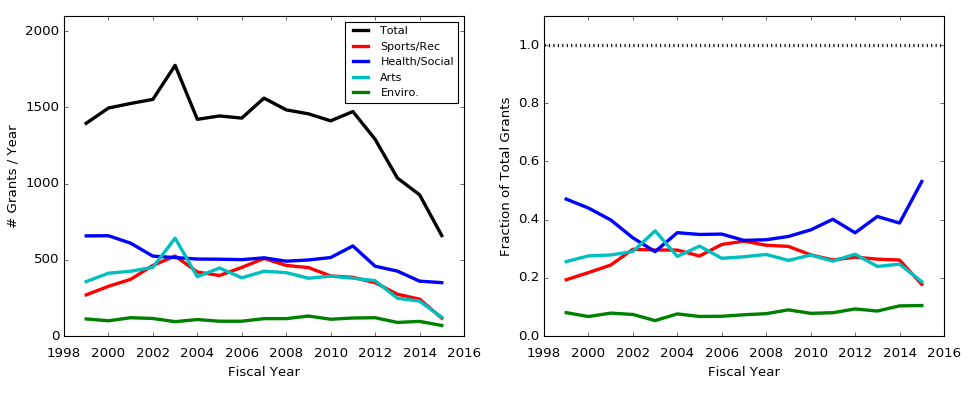

In [59]:
length = 12.2; height = 5.;

fig = plt.figure(figsize=(length,height))

# [:-1] removes 2016
ax1 = fig.add_axes([0.8/length,0.8/height, 5.0/length, 4.0/height])
ax1.plot(otf_annual["Year"][:-1], otf_annual["Number of Grants"][:-1], 'k-', label="Total", lw=3)
ax1.plot(otf_annual["Year"][:-1], otf_annual["Number of SR Grants"][:-1], 'r-', label="Sports/Rec", lw=3)
ax1.plot(otf_annual["Year"][:-1], otf_annual["Number of HSS Grants"][:-1], 'b-', label="Health/Social", lw=3)
ax1.plot(otf_annual["Year"][:-1], otf_annual["Number of AC Grants"][:-1], 'c-', label="Arts", lw=3)
ax1.plot(otf_annual["Year"][:-1], otf_annual["Number of Env Grants"][:-1], 'g-', label="Enviro.", lw=3)
ax1.set_xlabel("Fiscal Year"); ax1.set_ylabel("# Grants / Year"); ax1.tick_params(axis='x', pad=10); ax1.set_ylim([0, 2100]); ax1.legend(loc=1, fontsize="small");

ax2 = fig.add_axes([6.8/length,0.8/height, 5.0/length, 4.0/height])
ax2.plot(otf_annual["Year"][:-1], otf_annual["Number of SR Grants"][:-1]/otf_annual["Number of Grants"][:-1], 'r-', label="Sports/Rec", lw=3)
ax2.plot(otf_annual["Year"][:-1], otf_annual["Number of HSS Grants"][:-1]/otf_annual["Number of Grants"][:-1], 'b-', label="Health/Social", lw=3)
ax2.plot(otf_annual["Year"][:-1], otf_annual["Number of AC Grants"][:-1]/otf_annual["Number of Grants"][:-1], 'c-', label="Arts", lw=3)
ax2.plot(otf_annual["Year"][:-1], otf_annual["Number of Env Grants"][:-1]/otf_annual["Number of Grants"][:-1], 'g-', label="Enviro.", lw=3)
ax2.axhline(y=1, color="k", ls=":", lw=3)
ax2.set_xlabel("Fiscal Year"); ax2.set_ylabel("Fraction of Total Grants"); ax2.tick_params(axis='x', pad=10); ax2.set_ylim([0, 1.1]);

<h3>Real Funding vs. Time</h3>

Plotting the real value (inflation-adjusted) funding (solid black line) in the upper-left subplot of the figure below, we find that, other than blips around the year 2001 and 2011, funds have almost kept up with inflation (there is a very slight downward slope).  (The dashed black line is the total funding unadjusted for inflation.)  Interestingly, the total amount of money requested by applicants has gone down over the years, which can be more easily seen in the bottom-left subplot.

Breaking down the funding by sector (top-right figure), we see that health and social services comprise about 50% of all funding, with sports and arts taking about 20% each, and the environment about 10%.  There's a spike in healthcare spending in 2011 alongside corresponding dips in environmental and sports funding, indicating the 2011 spike is healthcare related (we'll look at that later).

Looking at the fraction of granted to requested funding (bottom-left), no systematic bias for underfunding proposed projects in any sector is obvious.  As discussed before, successful applications tend to have been granted 30% less money than asked for back in the early 2000, which is no longer the case in recent years.

<IPython.core.display.Javascript object>


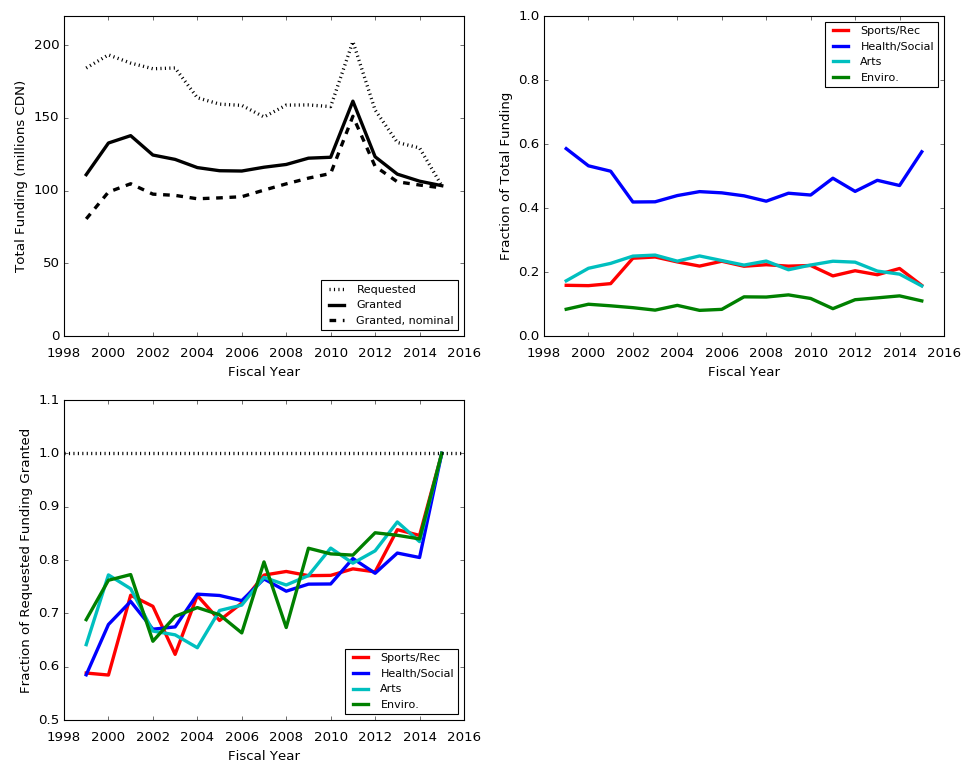

In [60]:
length = 12.2; height = 9.8;
fig = plt.figure(figsize=(length,height))

ax1 = fig.add_axes([0.8/length,5.6/height, 5.0/length, 4.0/height])
ax1.plot(otf_annual["Year"][:-1], otf_annual["Total Request Amt"][:-1]*infl["Infl"][:-1]/1e6, 'k:', label="Requested", lw=3)
ax1.plot(otf_annual["Year"][:-1], otf_annual["Total Grant Amt"][:-1]*infl["Infl"][:-1]/1e6, 'k-', label="Granted", lw=3)
ax1.plot(otf_annual["Year"][:-1], otf_annual["Total Grant Amt"][:-1]/1e6, 'k--', label="Granted, nominal", lw=3)
ax1.set_xlabel("Fiscal Year"); ax1.set_ylabel("Total Funding (millions CDN)"); ax1.set_ylim(0,220); ax1.tick_params(axis='x', pad=10); 
ax1.legend(loc=4, fontsize="small")

ax2 = fig.add_axes([6.8/length,5.6/height, 5.0/length, 4.0/height])
ax2.plot(otf_annual["Year"][:-1], otf_annual["Total SR Grant Amt"][:-1]/otf_annual["Total Grant Amt"][:-1], 'r-', label="Sports/Rec", lw=3)
ax2.plot(otf_annual["Year"][:-1], otf_annual["Total HSS Grant Amt"][:-1]/otf_annual["Total Grant Amt"][:-1], 'b-', label="Health/Social", lw=3)
ax2.plot(otf_annual["Year"][:-1], otf_annual["Total AC Grant Amt"][:-1]/otf_annual["Total Grant Amt"][:-1], 'c-', label="Arts", lw=3)
ax2.plot(otf_annual["Year"][:-1], otf_annual["Total Env Grant Amt"][:-1]/otf_annual["Total Grant Amt"][:-1], 'g-', label="Enviro.", lw=3)
ax2.set_xlabel("Fiscal Year"); ax2.set_ylabel("Fraction of Total Funding"); ax2.tick_params(axis='x', pad=10); ax2.set_ylim(0,1);
ax2.legend(loc=1, fontsize="small")

ax3 = fig.add_axes([0.8/length,0.8/height, 5.0/length, 4.0/height])
ax3.plot(otf_annual["Year"][:-1], otf_annual["Total SR Grant Amt"][:-1]/otf_annual["Total SR Request Amt"][:-1], 'r-', label="Sports/Rec", lw=3)
ax3.plot(otf_annual["Year"][:-1], otf_annual["Total HSS Grant Amt"][:-1]/otf_annual["Total HSS Request Amt"][:-1], 'b-', label="Health/Social", lw=3)
ax3.plot(otf_annual["Year"][:-1], otf_annual["Total AC Grant Amt"][:-1]/otf_annual["Total AC Request Amt"][:-1], 'c-', label="Arts", lw=3)
ax3.plot(otf_annual["Year"][:-1], otf_annual["Total Env Grant Amt"][:-1]/otf_annual["Total Env Request Amt"][:-1], 'g-', label="Enviro.", lw=3)
ax3.set_xlabel("Fiscal Year"); ax3.set_ylabel("Fraction of Requested Funding Granted"); ax3.tick_params(axis='x', pad=10); ax3.set_ylim(0.5,1.1);
ax3.axhline(y=1, color="k", ls=":", lw=3); ax3.legend(loc=4, fontsize="small")

<h3>Mean and Median Funding per Project in each Project Area</h3>

The distribution of project funding for the Project Areas can be probed by examining the mean and median for each.  Both median and mean funding have increased with time, which, given the declining number of total grants per year above, means that fewer projects are receiving the same amount of money.  Mean funding is typically a factor of 1.6 larger than median funding, indicative of the non-Gaussian distribution of funds per grant.

Of note is that, while environmental initiatives only comprise about 10% of OTF's total funding, the amount given per individual project is on par with that of health and social services!  This makes sense, since the systematic and infrastructure changes needed are larger for those two than for arts and sports.  Also, there is no spike in 2011 in median health funding, but there is in mean health funding, betraying a single large health-related project being funded that year.

<IPython.core.display.Javascript object>


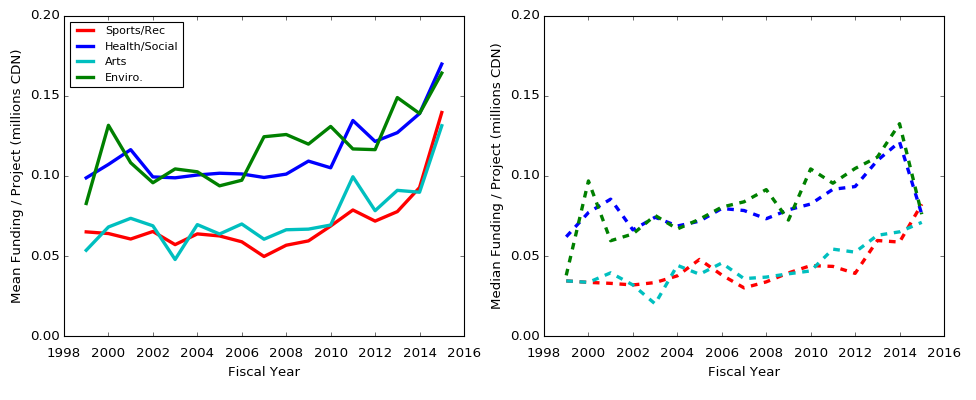

In [65]:
length = 12.2; height = 5.;

fig = plt.figure(figsize=(length,height))

ax1 = fig.add_axes([0.8/length,0.8/height, 5.0/length, 4.0/height])
ax1.plot(otf_annual["Year"][:-1], otf_annual["Mean SR Grant Amt"][:-1]*infl["Infl"][:-1]/1e6, 'r-', lw=3, label="Sports/Rec")
ax1.plot(otf_annual["Year"][:-1], otf_annual["Mean HSS Grant Amt"][:-1]*infl["Infl"][:-1]/1e6, 'b-', lw=3, label="Health/Social")
ax1.plot(otf_annual["Year"][:-1], otf_annual["Mean AC Grant Amt"][:-1]*infl["Infl"][:-1]/1e6, 'c-', lw=3, label="Arts")
ax1.plot(otf_annual["Year"][:-1], otf_annual["Mean Env Grant Amt"][:-1]*infl["Infl"][:-1]/1e6, 'g-', lw=3, label="Enviro.")
ax1.set_xlabel("Fiscal Year"); ax1.set_ylabel("Mean Funding / Project (millions CDN)"); ax1.tick_params(axis='x', pad=10); ax1.set_ylim(0.,0.2);
ax1.legend(loc=2, fontsize='small')

ax2 = fig.add_axes([6.8/length,0.8/height, 5.0/length, 4.0/height])
ax2.plot(otf_annual["Year"][:-1], otf_annual["Med SR Grant Amt"][:-1]*infl["Infl"][:-1]/1e6, 'r--', lw=3)
ax2.plot(otf_annual["Year"][:-1], otf_annual["Med HSS Grant Amt"][:-1]*infl["Infl"][:-1]/1e6, 'b--', lw=3)
ax2.plot(otf_annual["Year"][:-1], otf_annual["Med AC Grant Amt"][:-1]*infl["Infl"][:-1]/1e6, 'c--', lw=3)
ax2.plot(otf_annual["Year"][:-1], otf_annual["Med Env Grant Amt"][:-1]*infl["Infl"][:-1]/1e6, 'g--', lw=3)
ax2.set_xlabel("Fiscal Year"); ax2.set_ylabel("Median Funding / Project (millions CDN)"); ax2.tick_params(axis='x', pad=10); ax2.set_ylim(0.,0.2);

<h2>Per Capital OTF Spending vs. Time</h2>

Ontario population data comes from LINK HERE.

/home/cczhu/pythonenv/ml3/lib/python3.5/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skip_footer; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>


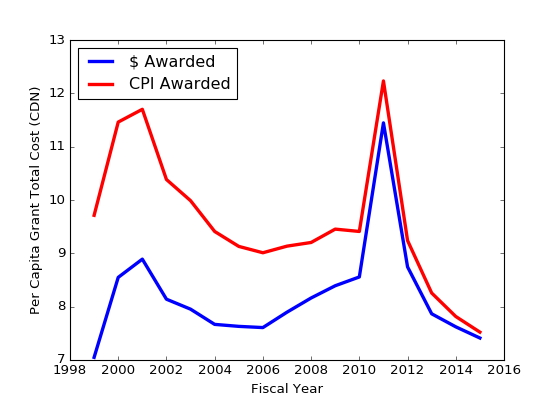

In [21]:
pop_ont = pd.read_csv(file_path + "population_of_ontario.csv", skiprows=4, skipfooter=8, names=["QYear", "Population"])
otf_annual["Ontario Population"] = pd.Series([float(x) for x in pop_ont.loc[::4,"Population"].copy()[:18]])

plt.figure(figsize=(7,5))
plt.plot(otf_annual["Year"][:-1], otf_annual["Total Grant Amt"][:-1]/otf_annual["Ontario Population"][:-1], 'b-', label="$ Awarded", lw=3)
plt.plot(otf_annual["Year"][:-1], otf_annual["Total Grant Amt"][:-1]/otf_annual["Ontario Population"][:-1]*inflation["Rate"][:-1], 'r-', label="CPI Awarded", lw=3)
plt.xlabel("Fiscal Year"); plt.ylabel("Per Capita Grant Total Cost (CDN)"); plt.legend(loc=2)

<h1>Granting Process Schedule</h1>

From the OTF website, there are multiple submission deadlines [throughout the year](http://www.otf.ca/apply-grant/registration-application-deadlines), the exact dates of which depend on the type of grant being administered.  *Before 2007, decisions were made on a monthly basis (though March and June were board meeting months, when capital expenditure could be approved, and March is the end of the FY); after, once every four months.*

<h2>Month of Submission</h2>

The plot below reflects the multiple submission deadlines, with a tail of keeners in the months prior to each.

<IPython.core.display.Javascript object>


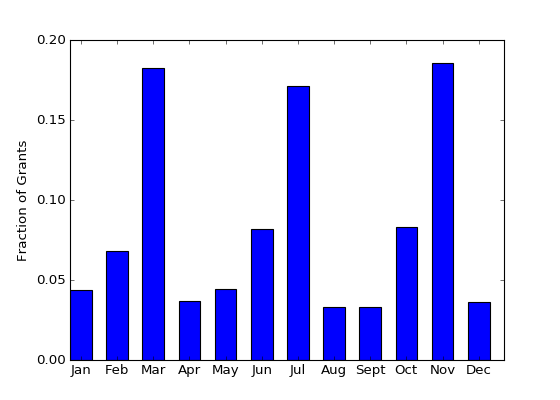

In [10]:
otf["Submission month"] = pd.DatetimeIndex(otf.loc[:,"Submission date"]).month

monthcount = otf["Submission month"].value_counts()

fig, ax = plt.subplots(figsize=(7, 5))
barwidth = 0.6
ax.bar(np.arange(0,12), np.array(monthcount)[np.argsort(monthcount.index)]/np.sum(np.array(monthcount)), barwidth)
ax.set_xticks([i + barwidth/2 for i in np.arange(0,12)])
ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"])
ax.set_ylabel("Fraction of Grants")

#plt.hist((otf["Approval date"] - otf["Submission date"]).astype('timedelta64[D]'), bins=100, log=True)
#plt.xlabel("Days Since Submission", fontsize=14); plt.ylabel("# Grants", fontsize=14); 
#plt.tick_params(axis='both', which='major', labelsize=12); plt.ylim(1e-1, 1e4);

<h2>Turnaround Time for Submission</h2>

What's the typical turnaround time - time between submission and acceptance - for a grant application?

<IPython.core.display.Javascript object>


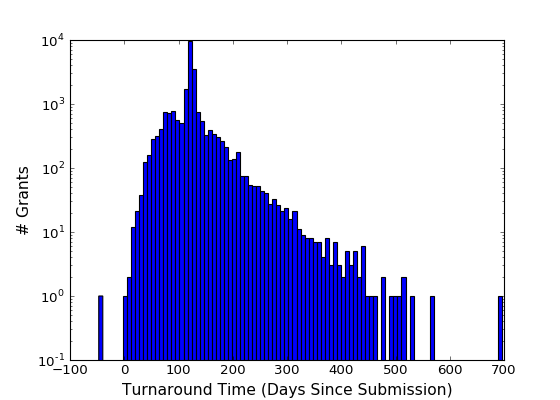

Interval between proposal submission and acceptance: mean = 123.3; median = 121.0 days


In [11]:
plt.figure(figsize=(7, 5))
tdiff = (otf["Approval date"] - otf["Submission date"]).astype('timedelta64[D]')
plt.hist(tdiff, bins=100, log=True, normed=False)
plt.xlabel("Turnaround Time (Days Since Submission)", fontsize=14); plt.ylabel("# Grants", fontsize=14); plt.ylim(1e-1, 1e4)
plt.tick_params(axis='both', which='major', labelsize=12);
print("Interval between proposal submission and acceptance: mean = {0:.1f}; median = {1:.1f} days".format(np.mean(tdiff), np.median(tdiff)))

Curiosly, there's one submission whose response time was 700 days, and two whose turnaround was either zero or negative!  These are indeed real, but the negative and zero-time ones are almost certainly mistakes.  The one that took 700 days was for a truck in Thunder Bay

In [12]:
i_too_small = np.where(otf["Approval date"] - otf["Submission date"] < np.timedelta64(1,'D'))[0]

print(otf["Submission date"][i_too_small])
print(otf["Approval date"][i_too_small])

i_too_big = np.where(otf["Approval date"] - otf["Submission date"] > np.timedelta64(600,'D'))[0]

print(otf.loc[i_too_big, ["Submission date", "Approval date", "Organization"]])
print(otf.loc[i_too_big, "Description"].tolist()[0])

19185   2002-05-10
23270   1999-10-05
Name: Submission date, dtype: datetime64[ns]
19185   2002-05-10
23270   1999-08-19
Name: Approval date, dtype: datetime64[ns]
      Submission date Approval date                           Organization
18326      2000-10-30    2002-09-27  Thunder Bay Nordic Trails Association
50,300 over one month to purchase a truck and other equipment to maintain the trails for the benefit of residents and visitors to the area.


<h1>Primary Recipients of Awards</h1>

In [ ]:
#### The slices will be ordered and plotted counter-clockwise.
popserve = otf["Population Served"].value_counts()

plt.figure(figsize=(8,8))
plt.pie(popserve[1:10], explode=np.zeros(9), labels=popserve.index.tolist()[1:10],
                autopct='%1.1f%%', shadow=True, startangle=0);

# Also possibly useful: https://stackoverflow.com/questions/31029560/plotting-categorical-data-with-pandas-and-matplotlib

<h1>Per Capita Expenditure by Region</h1>

OTF Geographical Area corresponds to [StatsCan census divisions](http://www12.statcan.ca/census-recensement/2011/dp-pd/hlt-fst/pd-pl/Table-Tableau.cfm?LANG=Eng&T=702&SR=1&S=51&O=A&RPP=9999&PR=35&CMA=0#symbol-dagger), allowing us to examine per-capital spending in a geographic region.  The translation between census and Geographical Area divisions is given by [this csv file](http://www.otf.ca/sites/default/files/otf_catchment_area-census_division_concordance_file.csv).

-Subdivide by area and subject - allows for understanding points of focus for various communities (possibly correlate against demographics?)
-Subdivid by area and group being serviced?
-Look only at 2015 - 2016?
-How often do organizations apply for grants? How often are they approved?  How much money is passed?
-What are the most funded organizations?